In [4]:
#------------------------------------Importing Modules------------------------------------------------
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import pil_to_array
#from osgeo import gdal
import numpy as np


C:\Users\Kiran Pandey\.conda\envs\Python_Geo\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\Kiran Pandey\.conda\envs\Python_Geo\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\Kiran Pandey\.conda\envs\Python_Geo\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\Kiran Pandey\.conda\envs\Python_Geo\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back 

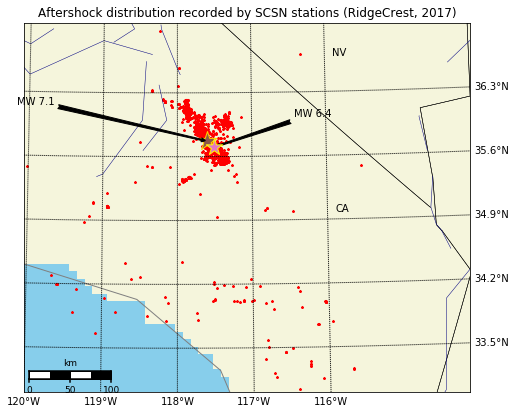

In [9]:
#-----------------------------------Ploting a basemap-------------------------------------------------
fig = plt.figure(figsize=(8, 8))
map = Basemap(llcrnrlon=-120, llcrnrlat=33, urcrnrlon=-114, urcrnrlat=37,
              projection='tmerc', lat_1=35., lat_2=40., lat_0=35, lon_0=-118.,resolution='c')

map.drawcoastlines(color='gray')
map.drawcountries(color='yellow')
map.drawstates(color='black')
#map.drawmapboundary(fill_color='aqua')
map.drawlsmask(land_color='beige',ocean_color='skyblue',grid=5,lakes=True)
map.drawrivers(color='navy')

map.drawmapscale(-119.4, 33.2, -120, 36, 100, barstyle='fancy')
map.drawparallels(np.arange(33.5, 37., .7),labels = (False,True,False,True))
map.drawmeridians(np.arange(-120, -115, 1),labels = (False,True,False,True))


#-----------------------------------Plotting aftershocks-------------------------------------------------
df = pd.read_csv(r'data/RC_BAK.csv')
RC_lat = df['Lat'].tolist()
RC_lon = df['Lon'].tolist()
map.scatter(RC_lon,RC_lat, latlon=True, s=5, marker='*', alpha=1, edgecolor='red',zorder=1)

#Plot for Mw 7.1 event
map.scatter(-117.599,35.77, latlon=True, s=400, marker='*', alpha=1, edgecolor='gold',zorder=3)
x1, y1 = map(-117.599,35.77)
x2, y2 = (-190.5,36.8)
plt.annotate('MW 7.1', xy=(x1, y1),  xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                color='black',
                arrowprops=dict(arrowstyle="fancy", color='black')
                )

#plot for Mw 6.4 event
map.scatter(-117.504,35.705, latlon=True, s=300, marker='*', alpha=1, edgecolor='yellow',zorder=4)
x3, y3 = map(-117.504,35.705)
x4, y4 = (80.,30)
plt.annotate('MW 6.4', xy=(x3, y3),  xycoords='data',
                xytext=(x4, y4), textcoords='offset points',
                color='black',
                arrowprops=dict(arrowstyle="fancy", color='black')
                )

#-----------------------------------Plotting Locations-------------------------------------------------
lons = [-115.9,-115.9]
lats = [36.686, 34.98]
x,y = map(lons, lats)
map.plot(x, y, 'b+', markersize=0)
labels = ['NV','CA']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label)
plt.title('Aftershock distribution recorded by SCSN stations (RidgeCrest, 2017)')
plt.savefig("plot/aftershockMap_RC.png", dpi=500)